In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as ncolors
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator
plt.style.use('seaborn')
%matplotlib inline

In [33]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [34]:
cdc = pd.read_csv(r"/Users/tessysomoye/Desktop/Internship/df.csv", parse_dates=['submission_date'])

In [35]:
cdc.head()

,Unnamed: 0,submission_date,Submission_Day,Submission_Month,Submission_Year,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths,Categorized
0,0,2021-01-25,25,1,2021,NE,187923,15.685547,15.685547,646,0.000000,1894,15.685547,15.685547,15,0.000000,2021-01-27 00:00:00,Not agree,Not agree,Lockdown
1,1,2020-01-25,25,1,2020,OR,0,15.685547,15.685547,0,15.685547,0,15.685547,15.685547,0,15.685547,2020-03-26 16:22:39,Agree,Agree,Pre-lockdown
2,2,2020-07-23,23,7,2020,KY,25147,23882.000000,1265.000000,607,61.000000,684,680.000000,4.000000,7,0.000000,2020-07-24 14:18:40,Agree,Agree,Lockdown
3,3,2021-02-01,1,2,2021,DC,37008,15.685547,15.685547,136,0.000000,916,15.685547,15.685547,3,0.000000,2021-02-02 14:51:51,15.685546875,15.685546875,Lockdown
4,4,2021-05-11,11,5,2021,NJ,1008607,881171.000000,127436.000000,561,25.000000,25841,23201.000000,2640.000000,31,0.000000,2021-05-12 14:33:56,Agree,Agree,Post-lockdown


In [36]:
cdc.columns

Index(['Unnamed: 0', 'submission_date', 'Submission_Day', 'Submission_Month',
       'Submission_Year', 'state', 'tot_cases', 'conf_cases', 'prob_cases',
       'new_case', 'pnew_case', 'tot_death', 'conf_death', 'prob_death',
       'new_death', 'pnew_death', 'created_at', 'consent_cases',
       'consent_deaths', 'Categorized'],
      dtype='object')

In [37]:
cdc.shape

(30720, 20)

In [38]:
Texas = cdc.loc[cdc['state']=='TX']

In [39]:
Texas.shape

(512, 20)

In [40]:
cdc['submission_date'].min(), cdc['submission_date'].max()

(Timestamp('2020-01-22 00:00:00'), Timestamp('2021-06-16 00:00:00'))

In [41]:
fatality = cdc.groupby('submission_date')['tot_death'].sum().reset_index()

In [42]:
fatality.shape

(512, 2)

In [43]:
fatality.head()

,submission_date,tot_death
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


In [44]:
fatality = fatality.set_index('submission_date')
fatality.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2021-06-07', '2021-06-08', '2021-06-09', '2021-06-10',
               '2021-06-11', '2021-06-12', '2021-06-13', '2021-06-14',
               '2021-06-15', '2021-06-16'],
              dtype='datetime64[ns]', name='submission_date', length=512, freq=None)

In [45]:
y = fatality['tot_death'].resample('MS').mean()

In [46]:
y['2020':]

submission_date
2020-01-01         0.000000
2020-02-01       204.034483
2020-03-01      1012.419355
2020-04-01     35347.700000
2020-05-01     90297.870968
2020-06-01    119757.300000
2020-07-01    144167.032258
2020-08-01    176380.967742
2020-09-01    201661.500000
2020-10-01    223741.290323
2020-11-01    256498.000000
2020-12-01    323185.870968
2021-01-01    420256.451613
2021-02-01    502657.500000
2021-03-01    545670.709677
2021-04-01    568240.266667
2021-05-01    585996.096774
2021-06-01    595924.000000
Freq: MS, Name: tot_death, dtype: float64

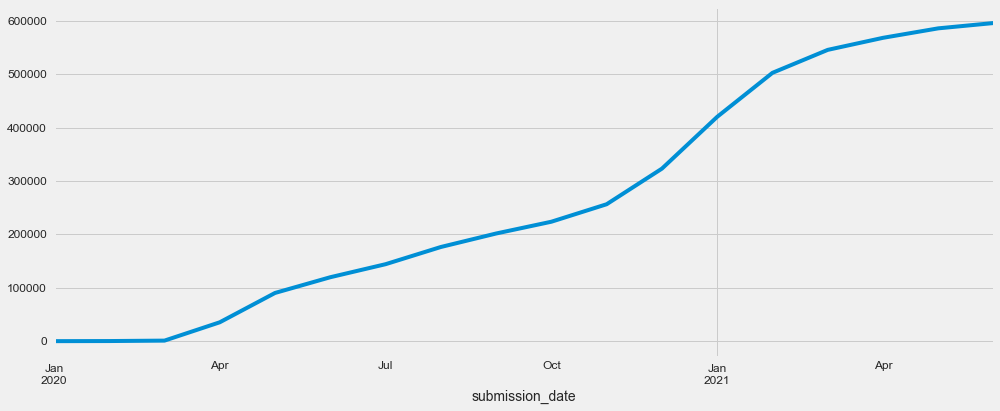

In [47]:
y.plot(figsize=(15, 6))
plt.show()

In [48]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [49]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:484.3264982704757
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:151.65614210603246
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:152.71520775140863
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:175.17724399734584
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:148.41409707807335
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:448.0078708737244
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:116.6168449648862
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:124.21709348449195
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:172.45585468027502
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:118.58947184133731
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:390.3499466864662
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:95.45508974090059
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:96.41817618115098
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 -

In [50]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 0),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4112         -0       -inf      0.000       0.411       0.411
ar.S.L12            0         -0        nan        nan           0           0
sigma2      4.959e+08         -0       -inf      0.000    4.96e+08    4.96e+08


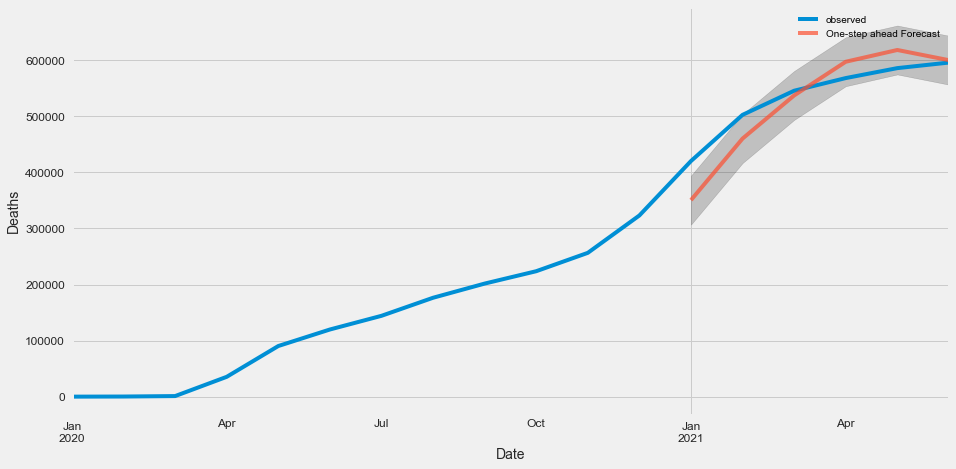

In [51]:
pred = results.get_prediction(start=pd.to_datetime('2021-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Deaths')
plt.legend()
plt.show()

In [52]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 0),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12            0         -0        nan        nan           0           0
sigma2      1.963e+09         -0       -inf      0.000    1.96e+09    1.96e+09


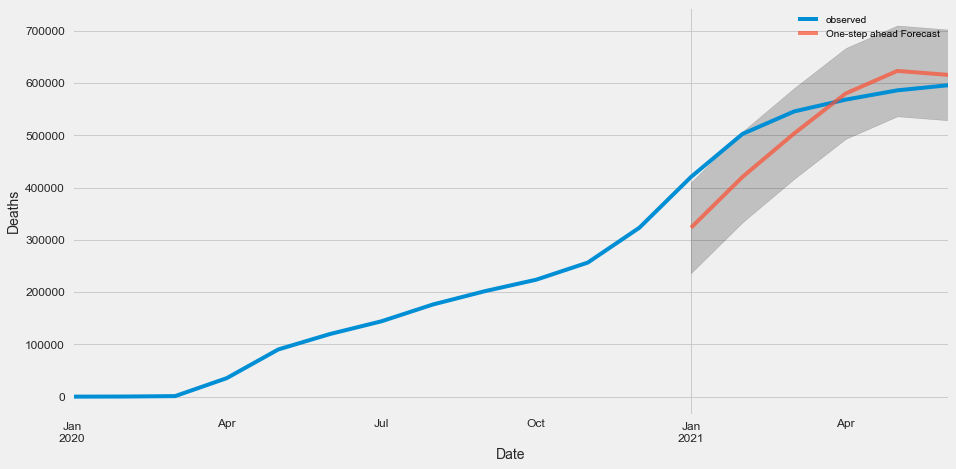

In [53]:
pred = results.get_prediction(start=pd.to_datetime('2021-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Deaths')
plt.legend()
plt.show()

In [54]:
y_forecasted = pred.predicted_mean
y_truth = y['2021-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 3310604283.99


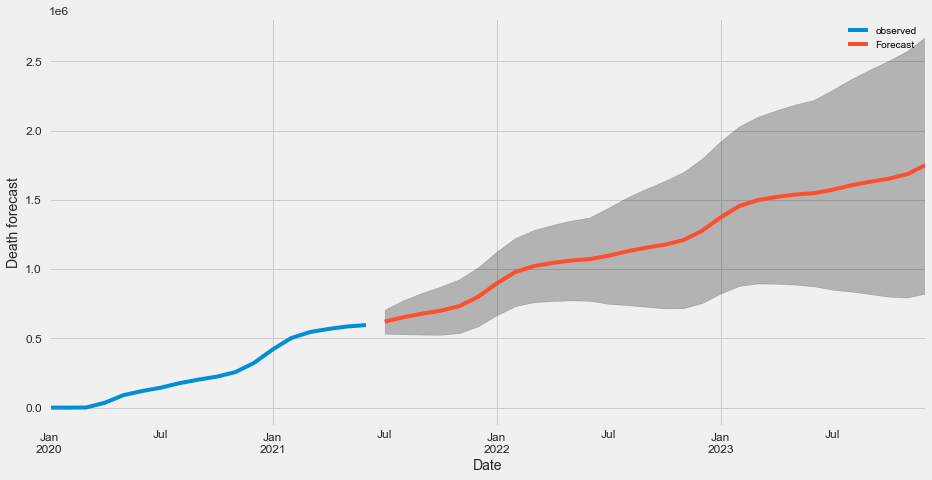

In [55]:
pred_uc = results.get_forecast(steps=30)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Death forecast')
plt.legend()
plt.show()

FORECAST FOR CONFIRMED CASES

In [56]:
fatality = cdc.groupby('submission_date')['conf_cases'].sum().reset_index()

In [57]:
fatality = fatality.set_index('submission_date')
fatality.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2021-06-07', '2021-06-08', '2021-06-09', '2021-06-10',
               '2021-06-11', '2021-06-12', '2021-06-13', '2021-06-14',
               '2021-06-15', '2021-06-16'],
              dtype='datetime64[ns]', name='submission_date', length=512, freq=None)

In [58]:
y = fatality['conf_cases'].resample('MS').mean()

In [59]:
y['2020':]

submission_date
2020-01-01    9.570473e+02
2020-02-01    9.808719e+02
2020-03-01    2.347270e+04
2020-04-01    3.293654e+05
2020-05-01    7.855975e+05
2020-06-01    1.065221e+06
2020-07-01    1.738166e+06
2020-08-01    2.425056e+06
2020-09-01    3.045058e+06
2020-10-01    3.773480e+06
2020-11-01    5.381698e+06
2020-12-01    7.951739e+06
2021-01-01    1.102081e+07
2021-02-01    1.271673e+07
2021-03-01    1.352794e+07
2021-04-01    1.444617e+07
2021-05-01    1.509461e+07
2021-06-01    1.529227e+07
Freq: MS, Name: conf_cases, dtype: float64

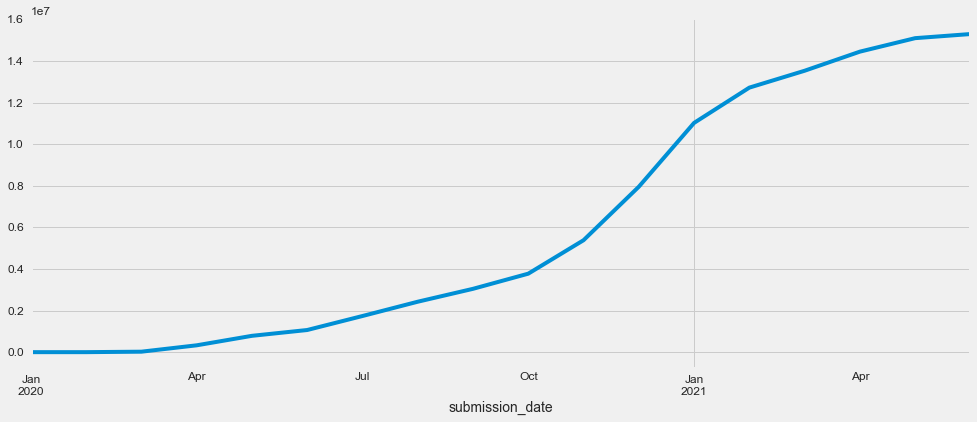

In [60]:
y.plot(figsize=(15, 6))
plt.show()

In [61]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [62]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:593.236631588998
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:181.85082869078582
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:185.73957995439437
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:213.84096515611932
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:183.85088989642702
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:596.6986753914481
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:142.3226105361226
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:143.185291279552
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:223.95409357526734
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:144.32855109048256
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:497.18012091045443
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:121.50797194632564
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:118.55782135268872
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 -

In [63]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 0),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4917         -0       -inf      0.000       0.492       0.492
ar.S.L12            0         -0        nan        nan           0           0
sigma2      2.386e+10         -0       -inf      0.000    2.39e+10    2.39e+10


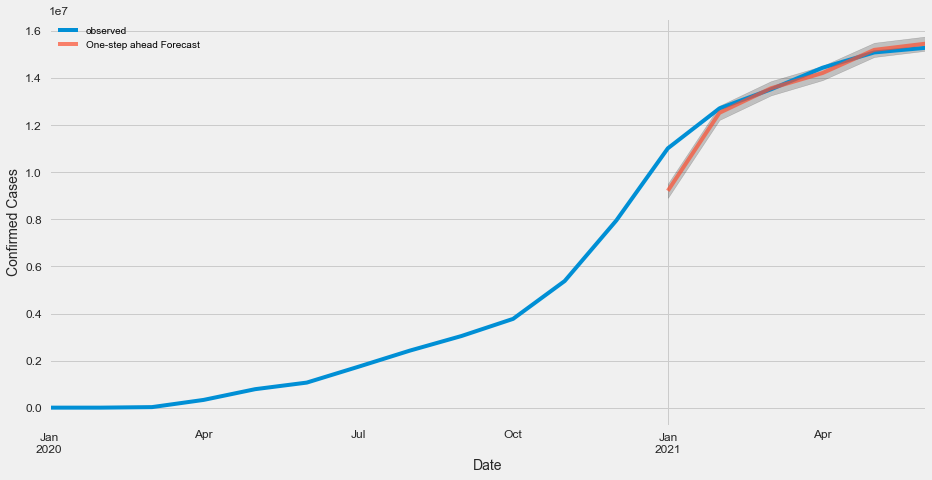

In [64]:
pred = results.get_prediction(start=pd.to_datetime('2021-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Confirmed Cases')
plt.legend()
plt.show()

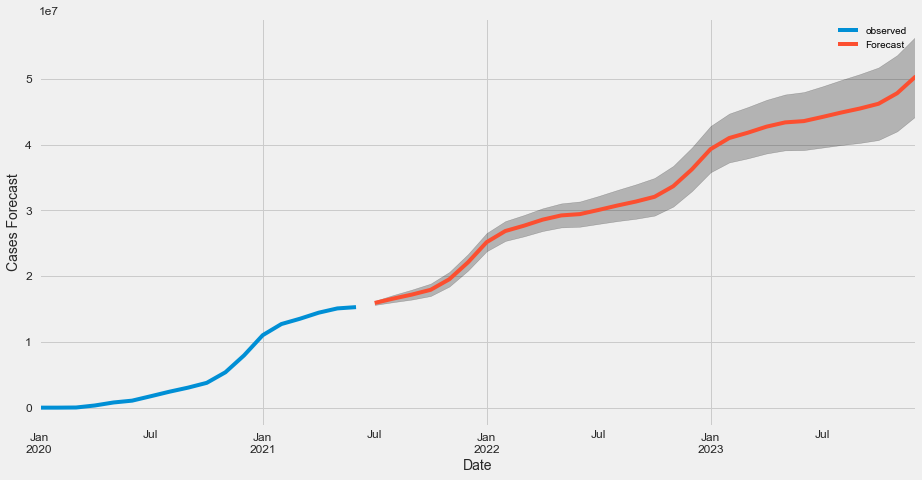

In [65]:
pred_uc = results.get_forecast(steps=30)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Cases Forecast')
plt.legend()
plt.show()